<a href="https://colab.research.google.com/github/KevinTheRainmaker/AI_PlayGround/blob/main/K_means_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [4]:
data = pd.read_excel('CustomerDataSet.xls')
data.head()

,Customer ID,ItemsBought,ItemsReturned,ZipCode,Product
0,4,45,10,2,1365
1,5,42,18,5,2764
2,6,50,0,1,1343
3,8,13,12,4,2435
4,9,10,7,3,2435


In [6]:
processed_data = data.copy()

# Nomalization
scaler = preprocessing.MinMaxScaler()
processed_data[['ItemsBought', 'ItemsReturned']] = scaler.fit_transform(processed_data[['ItemsBought', 'ItemsReturned']])

# Figure
plt.figure(figsize = (10, 6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

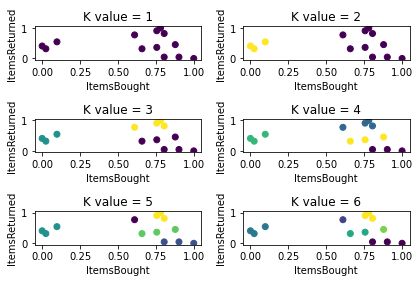

In [11]:
for i in range(1, 7):
  # Create Cluster
  estimator = KMeans(n_clusters = i)
  ids = estimator.fit_predict(processed_data[['ItemsBought', 'ItemsReturned']])

  plt.subplot(3, 2, i)
  plt.tight_layout()

  plt.title("K value = {}".format(i))
  plt.xlabel('ItemsBought')
  plt.ylabel('ItemsReturned')

  plt.scatter(processed_data['ItemsBought'], processed_data['ItemsReturned'], c=ids)  
plt.show()

Text(0.5, 0, 'ItemsBought')

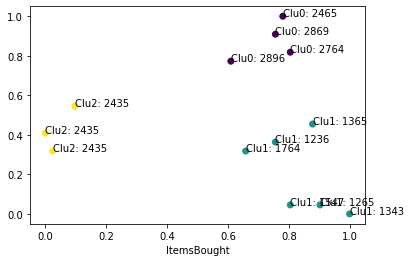

In [13]:
estimator = KMeans(n_clusters = 3)
cluster_ids = estimator.fit_predict(processed_data[['ItemsBought', 'ItemsReturned']])
# create a scatter plot
plt.scatter(processed_data['ItemsBought'], processed_data['ItemsReturned'], c=cluster_ids)

for index, c_id, bought, returned, zip_code, product in processed_data.itertuples():
  plt.annotate("Clu{}: {}".format(cluster_ids[index], product),(bought, returned))
    
plt.xlabel('ItemsBought')

In [14]:
data[ cluster_ids == 1 ]

,Customer ID,ItemsBought,ItemsReturned,ZipCode,Product
0,4,45,10,2,1365
2,6,50,0,1,1343
7,12,40,8,2,1236
9,15,36,7,2,1764
10,16,42,1,1,1547
11,17,46,1,1,1265


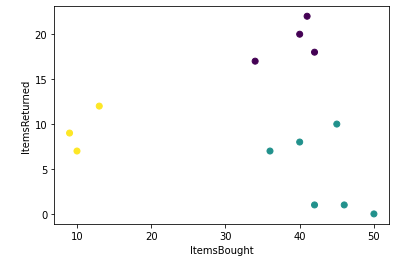

In [16]:
plt.scatter(data['ItemsBought'], data['ItemsReturned'], c=cluster_ids)
for (index, c_id, bought, returned, zip_code, product) in processed_data.itertuples():
    plt.annotate(zip_code,(bought + 0.6, returned + 0.6))
    
plt.xlabel('ItemsBought')
plt.ylabel('ItemsReturned')
plt.show()